<a href="https://colab.research.google.com/github/Victoriambaka/INDEPENDENT-PROJECT-12/blob/main/INDEPENDENT_PROJECT_12_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INDEPENDENT PROJECT WK 12: REGRESSION.( Multiple Linear Regression, Quantile Regression, Ridge Regression, Lasso Regression, Elastic Net Regression)

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.


---



Dataset


The dataset to use for this project can be found by following this link: [http://bit.ly/IndependentProjectWeek7Dataset (Links to an external site.)]. 

Below is the dataset glossary:

-  Id 
-  price  - Price of the house
-  bedrooms - Number of Bedrooms
-  bathrooms - Number of Bathrooms
-  sqft_living - Square feet area of living area
-  sqft_lot  - Square feet area of parking Layout
-  floors - Number of Floors
-  waterfront - Whether waterfront is there or not
-  view - Number of Views
-  grade - Grades
-  sqft_above
-  sqft_basement - Square feet area off basement
-  yr_built - Year the house is built
-  yr_renovated - Year the house is renovated
-  zipcode - zipcode os the house
-  lat : Latitude of the house
-  lon : Longitude of the house
-  sqft_living15
-  sqft_lot15

## Defining the question

Study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow accurate prediction of the sale of prices upon being provided with the predictor variables.

### Metric for Success
*    The metric for success is being able to create a model that predicts the sale of prices accurately.

## Context


*   Since this is an analysis that includes prediction- extrapolating from current data- then regression analysis suits this analysis best. This is a regression problem



## Experiment design

*    Read and explore given dataset
*    Define the appropriateness of the available data to answer the given question.
*    Data Cleaning
*    Exploratory Data Analysis
*    Univariate, Bivariate Analysis, Multivariate Analysis
*    Performing regression analysis.
(while incorporating categorical independent variables into the models)
*    Checking for multicollinearity
*    Provide a recommendation based on your analysis. 
*    Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
*    Challenging the solution by providing insights on how improvements in  the model can be made.
      

## Reading data

In [ ]:
# Importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

# Reading the data
url = 'http://bit.ly/IndependentProjectWeek7Dataset'
houses = pd.read_csv(url)


## Data Exploration

In [ ]:
# viewing top of the dataset
houses.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# Viewing the bottom of the dataset
houses.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# Checking the number of records
houses.shape

(21613, 20)

In [ ]:
# Getting summaries of our data
houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Data Appropriateness

In [ ]:
# Checking the data types
houses.dtypes   # All the data is in a suitable type for insight to be derived from it.

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

## Data Cleaning

In [ ]:
# Finding outliers in the dataset.
import matplotlib.pyplot as plt

houses['price'].boxplot()

AttributeError: ignored

In [ ]:
# Finding anomalies in the data
houses.duplicated().sum()  # There are 3 duplicates.

3

In [ ]:
# Dropping the duplicates
houses = houses.drop_duplicates()

In [ ]:
# confirming dropped duplicates
houses.duplicated().sum()

0

In [ ]:
# Finding and dealing with null values.
houses.isnull().sum()   # There are no null values

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# Other cleaning procedures
# Dropping irrelevant columns
houses = houses.drop('id', axis = 1)
houses.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Exploratory Data Analysis

### Multivariate Analysis

In [ ]:
# Because there are so many columns and features
# [I decided to begin with multivariate analysis where a reduction technique shall be applied to reduce the values. (so I dont crash my RAM trying to get graphs for all the columns.)]

In [ ]:
# Performing Linear Discriminant Analysis


In [ ]:
# Step 3: Once dataset is loaded into a pandas data frame object, the first step is to divide dataset 
# into features and corresponding labels and then divide the resultant dataset into training and test sets. 
# The following code divides data into labels and feature set. 
# The code assigns the first ten columns of the dataset i.e. the feature set to X variable 
# while the values in the eleventh column (labels) are assigned to the y variable.
#
X = houses.iloc[:, 0:10].values
y = houses.iloc[:, 10].values

In [ ]:
# Step 4: The following code divides data into training and test sets
#
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Step 5: Feature scaling
# We now need to perform feature scaling. We execute the following code to do so:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Step 6: Peforming LDA
# It requires only four lines of code to perform LDA with Scikit-Learn. 
# The LinearDiscriminantAnalysis class of the sklearn.discriminant_analysis 
# library can be used to Perform LDA in Python. 
# Let's take a look at the following code
#

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)
# In the script above the LinearDiscriminantAnalysis class is imported as LDA. 
# We have to pass the value for the n_components parameter of the LDA, 
# which refers to the number of linear discriminates that we want to retrieve. 
# In this case we set the n_components to 1, since we first want to check the performance 
# of our classifier with a single linear discriminant. 
# Finally we execute the fit and transform methods to actually retrieve the linear discriminants.
# Notice, in case of LDA, the transform method takes two parameters: the X_train and the y_train. 
# This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants.

In [ ]:
# Step 7: Training and Making Predictions
# We will use the random forest classifier to evaluate the performance of a PCA-reduced algorithms as shown
# 

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
# Step 8: Evaluating the Performance
# As always, the last step is to evaluate performance of the algorithm 
# with the help of a confusion matrix and find the accuracy of the prediction.
# 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# We can see that with one linear discriminant, the algorithm achieved an accuracy of 100%, 
# which is greater than the accuracy achieved with one principal component, which was 93.33%.

[[11  0  0]
 [ 0 13  0]
 [ 0  2  4]]
Accuracy0.9333333333333333


### Univariate Analysis.

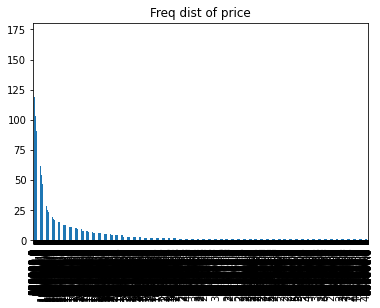

In [ ]:
# Plotting univariate graphs and recording their observations

houses['price'].value_counts().plot.bar(title='Freq dist of price');

In [ ]:
US_med['Income'].value_counts().plot.hist(title='Freq dist of Income')

In [ ]:
US_med['Income'].value_counts().plot.hist(title='Freq dist of Income')

In [ ]:
US_med['Income'].value_counts().plot.hist(title='Freq dist of Income')

In [ ]:
US_med['Income'].value_counts().plot.hist(title='Freq dist of Income')

## Regression Analysis

*    Multiple Linear Regression
*    Quantile Regression
*    Ridge Regression
*    Lasso Regression
*    Elastic Net Regression

In [ ]:
# While performing your regression analysis, you will be required to perform modeling using the given regression techniques then evaluate their performance. 

## Multicollinearity check

## Recommendation

## Residual Plots

## Heteroskedasticity check using Barlett's test

## Challenging the solution by providing insights on how improvements in model can be made.

In [ ]:
# You will be then required to provide your observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem.